In [2]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

***<font color=red>线性回归<font>***

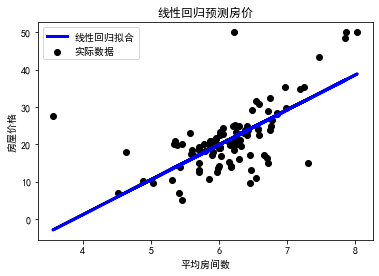

均方误差(Mean Squared Error): 46.14
决定系数(R^2): 0.37


In [3]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 加载波士顿房价数据集
boston = datasets.load_boston()

# 准备数据
X = boston.data[:, np.newaxis, 5]  # 选取房间数作为特征
y = boston.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 可视化结果
plt.scatter(X_test, y_test, color='black', label='实际数据')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='线性回归拟合')
plt.title('线性回归预测房价')
plt.xlabel('平均房间数')
plt.ylabel('房屋价格')
plt.legend()
plt.show()

print(f"均方误差(Mean Squared Error): {mse:.2f}")
print(f"决定系数(R^2): {r2:.2f}")

***<font color=red>逻辑回归<font>***

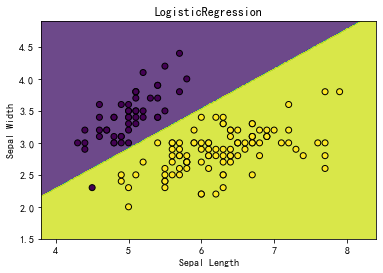

In [6]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 加载Iris数据集
iris = datasets.load_iris()
X = iris.data[:, :2]  # 仅使用前两个特征，便于可视化
y = (iris.target != 0) * 1  # 将标签转换为二进制分类问题

# 构建逻辑回归模型
model = LogisticRegression(solver='liblinear')

# 训练模型
model.fit(X, y)

# 绘制决策边界图
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('LogisticRegression')
plt.show()

***<font color=red>支持向量机<font>***

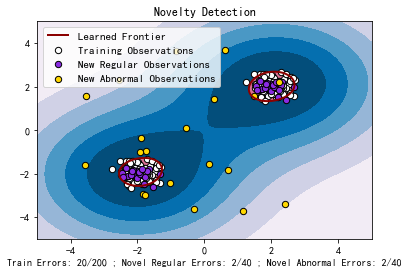

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# 生成一个合成数据集
np.random.seed(0)
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 构建支持向量机模型
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# 预测结果
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# 统计预测错误数量
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# 绘制图像
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "Learned Frontier",
        "Training Observations",
        "New Regular Observations",
        "New Abnormal Observations",
    ],
    loc="upper left",
    prop=plt.matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "Train Errors: %d/200 ; Novel Regular Errors: %d/40 ; Novel Abnormal Errors: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()

***<font color=red>决策树和随机森林<font>***

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 加载Iris数据集
iris = load_iris()

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# 创建一个包含2x2子图的图形
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# 为不同的特征组合训练和绘制决策树和随机森林的决策边界
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2]]):
    X = iris.data[:, pair]
    y = iris.target

    # 训练决策树模型
    clf_tree = DecisionTreeClassifier().fit(X, y)

    # 训练随机森林模型
    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X, y)

    # 绘制决策边界
    ax = sub[pairidx // 2, pairidx % 2]
    DecisionBoundaryDisplay.from_estimator(
        clf_tree,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )
    ax.set_title("Decision Tree")

    DecisionBoundaryDisplay.from_estimator(
        clf_rf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )
    ax.set_title("Random Forest")

    # 绘制训练点
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

# 添加标题和图例
plt.suptitle("Decision Surface of Decision Trees and Random Forest on Pairs of Features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (d:\SoftWare\Anaconda\lib\site-packages\sklearn\inspection\__init__.py)

***<font color=red>K-Means<font>***

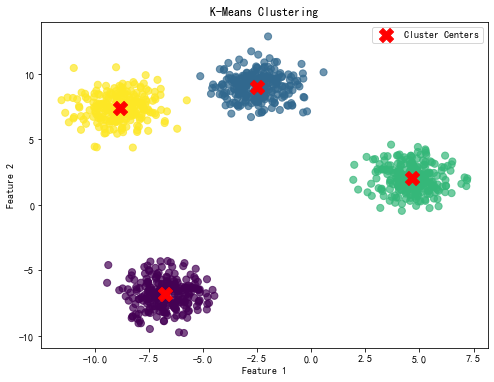

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 生成合成数据
n_samples = 1000
n_features = 2
n_clusters = 4
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# 构建K-Means模型
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

# 训练模型
kmeans.fit(X)

# 获取簇中心和预测标签
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# 绘制数据点和簇中心
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

***<font color=red>集成方法<font>***

<ipython-input-10-dbf686f6ec5d>:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
<ipython-input-10-dbf686f6ec5d>:68: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))


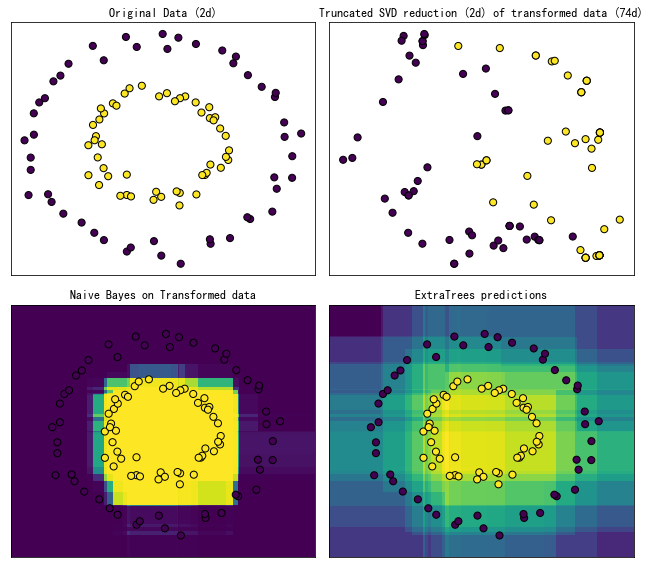

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import ExtraTreesClassifier, RandomTreesEmbedding
from sklearn.naive_bayes import BernoulliNB

# 创建一个合成数据集
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)

# 使用RandomTreesEmbedding来转换数据
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(X)

# 使用TruncatedSVD降维以可视化
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)

# 使用BernoulliNB学习一个朴素贝叶斯分类器
nb = BernoulliNB()
nb.fit(X_transformed, y)

# 使用ExtraTreesClassifier进行比较
trees = ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X, y)

# 绘制图表
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50, edgecolor="k")
ax.set_title(
    "Truncated SVD reduction (2d) of transformed data (%dd)" % X_transformed.shape[1]
)
ax.set_xticks(())
ax.set_yticks(())

# 在原始空间中绘制决策边界
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 使用RandomTreesEmbedding来转换网格
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1,], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# 使用ExtraTreesClassifier进行预测
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()

***<font color=red>高斯混合模型<font>***

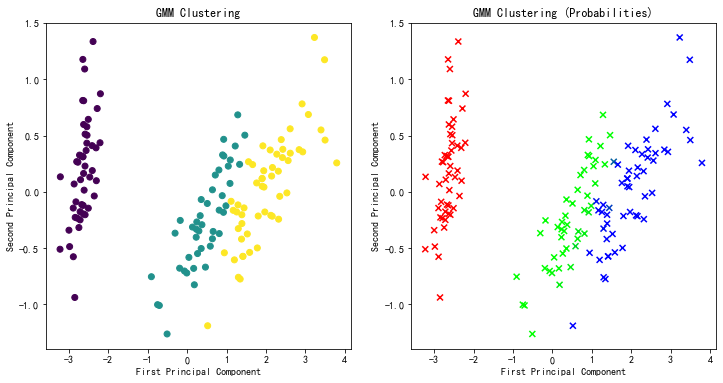

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# 加载Iris数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 创建GMM模型
n_components = 3  # 聚类数量，这里选择3类
gmm = GaussianMixture(n_components=n_components)

# 拟合模型
gmm.fit(X)

# 预测每个样本的聚类标签
labels = gmm.predict(X)

# 获取每个样本属于每个聚类的概率
probs = gmm.predict_proba(X)

# 降维可视化
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 绘制聚类结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=probs, cmap='viridis', marker='x')
plt.title('GMM Clustering (Probabilities)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

***<font color=red>梯度提升树<font>***

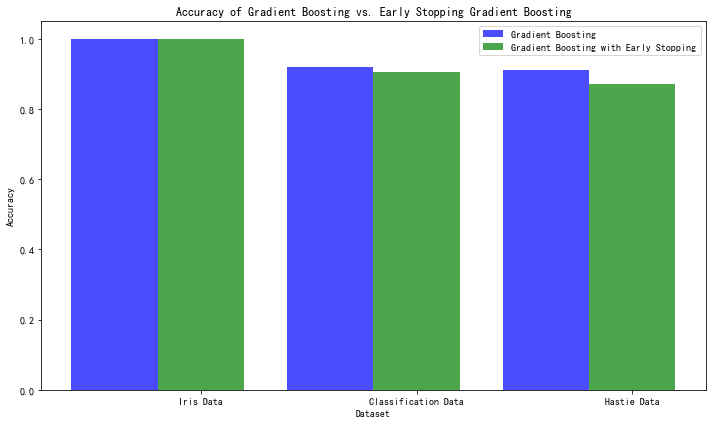

In [12]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split

# 数据集和名称
data_list = [
    datasets.load_iris(return_X_y=True),
    datasets.make_classification(n_samples=800, random_state=0),
    datasets.make_hastie_10_2(n_samples=2000, random_state=0),
]
names = ["Iris Data", "Classification Data", "Hastie Data"]

# 初始化列表用于存储结果
n_gb = []
score_gb = []
time_gb = []
n_gbes = []
score_gbes = []
time_gbes = []

n_estimators = 200

for X, y in data_list:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    # 创建梯度提升树模型
    gbes = ensemble.GradientBoostingClassifier(
        n_estimators=n_estimators,
        validation_fraction=0.2,
        n_iter_no_change=5,
        tol=0.01,
        random_state=0,
    )
    gb = ensemble.GradientBoostingClassifier(n_estimators=n_estimators, random_state=0)

    # 训练并记录时间
    start = time.time()
    gb.fit(X_train, y_train)
    time_gb.append(time.time() - start)

    start = time.time()
    gbes.fit(X_train, y_train)
    time_gbes.append(time.time() - start)

    # 计算准确度并记录
    score_gb.append(gb.score(X_test, y_test))
    score_gbes.append(gbes.score(X_test, y_test))

    # 记录训练的迭代次数
    n_gb.append(gb.n_estimators_)
    n_gbes.append(gbes.n_estimators_)

# 绘制图形
bar_width = 0.2
n = len(data_list)
index = np.arange(0, n * bar_width, bar_width) * 2.5
index = index[0:n]

plt.figure(figsize=(10, 6))
plt.bar(index, score_gb, bar_width, label='Gradient Boosting', color='b', alpha=0.7)
plt.bar(index + bar_width, score_gbes, bar_width, label='Gradient Boosting with Early Stopping', color='g', alpha=0.7)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy of Gradient Boosting vs. Early Stopping Gradient Boosting')
plt.xticks(index + bar_width, names)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

***<font color=red>AdaBoost<font>***

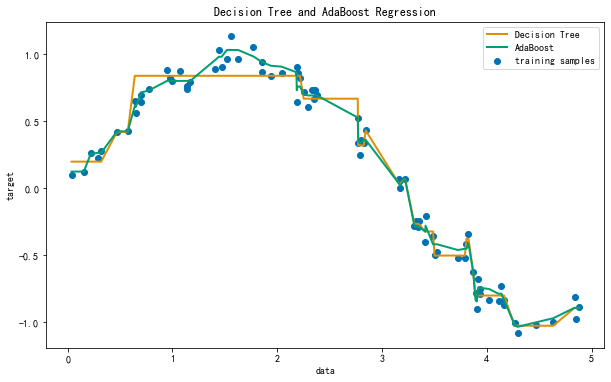

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# 生成模拟数据
rng = np.random.default_rng(42)
X = np.sort(5 * rng.random(80))[:, np.newaxis]
y = np.sin(X).ravel() + rng.normal(0, 0.1, X.shape[0])

# 使用决策树和AdaBoost回归器
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# 可视化结果
colors = sns.color_palette("colorblind")
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="Decision Tree", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="AdaBoost", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree and AdaBoost Regression")
plt.legend()
plt.show()

***<font color=red>神经网络<font>***

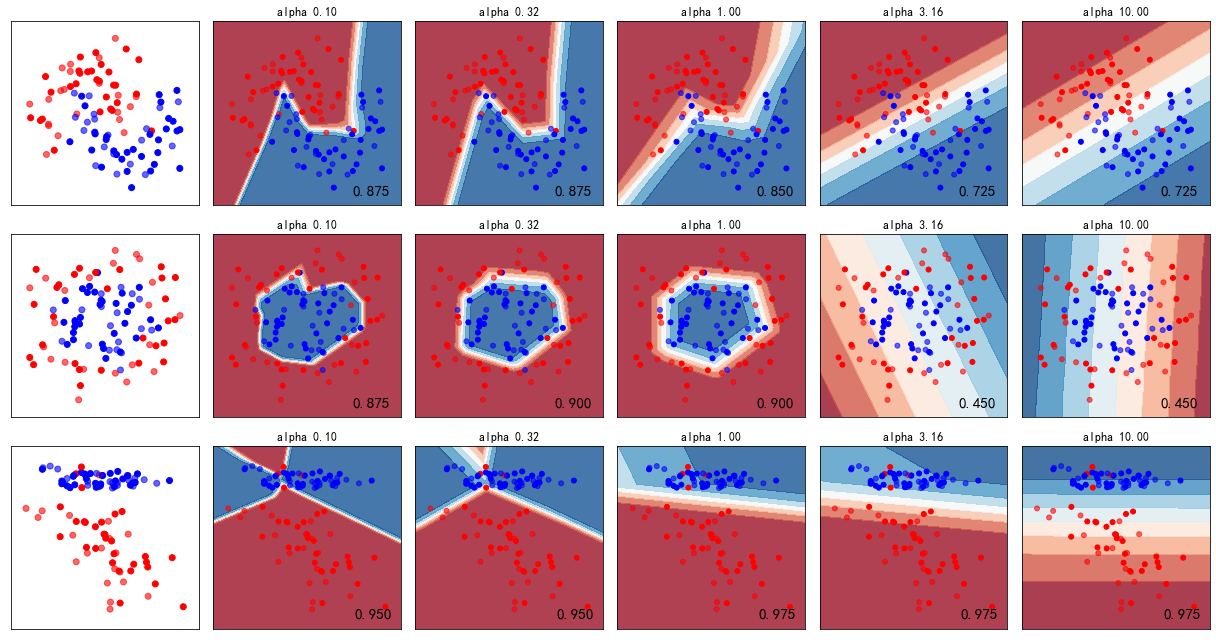

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

h = 0.02  # step size in the mesh

# 定义不同的alpha值
alphas = np.logspace(-1, 1, 5)

# 为每个alpha值构建一个MLP分类器
classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        MLPClassifier(
            solver="lbfgs",
            alpha=alpha,
            random_state=1,
            max_iter=2000,
            hidden_layer_sizes=[10, 10]
        )
    )
    names.append(f"alpha {alpha:.2f}")

# 创建数据集
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)
]

# 可视化结果
figure = plt.figure(figsize=(17, 9))
i = 1
# 遍历数据集
for X, y in datasets:
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=25)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, s=25, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - 0.3, yy.min() + 0.3, f"{score:.3f}", size=15, horizontalalignment="right")
        i += 1

plt.tight_layout()
plt.show()